<a href="https://colab.research.google.com/github/jacob-torres/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/Jacob_Torres_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df_original = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df_original.shape)
df_original.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [ ]:
df = df_original.drop(columns=['diagnosis', 'Unnamed: 32'])
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [ ]:
df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
df = df.drop('id', axis=1)
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Subset the data for kmeans clustering
df = df.copy()[
        ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst']
]
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000


[255499233.1336417, 77282652.76919657, 46878484.46069864, 28781127.702141505, 20180353.514803693, 16176871.156065524, 12859545.712581772, 10952676.698887236, 9164492.365829851, 8167911.523061521, 7315384.09659356, 6536910.992331707]


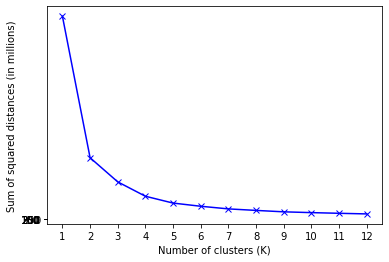

In [ ]:
# Find the best value for k:
sum_of_squared_distances = []
K = range(1, 13)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(df)
  sum_of_squared_distances.append(km.inertia_)

# Print the inertia values
print(sum_of_squared_distances)

# Plot the elbow graph
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances (in millions)')
plt.xticks(ticks=range(1, 13))
plt.yticks(ticks=range(0, 350, 50))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.show()

In [ ]:
# Audio graph imports
!pip install sonipy
from sonipy.sonify import SonifyTool

In [ ]:
# Audio graph
duration_args = {'time_total': 3000}

# Uncomment the line below to play the audio graph
#SonifyTool(x=K, y=sum_of_squared_distances, duration_args=duration_args).play()

In [ ]:
# Perform kmeans clustering with k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
df['clusters'] = kmeans.labels_
df['clusters'].value_counts()

1    439
0    130
Name: clusters, dtype: int64

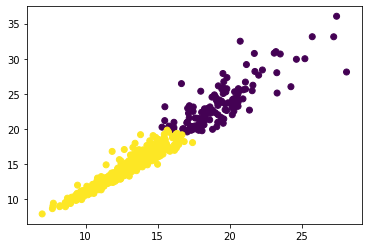

In [ ]:
# Visualize the clusters
plt.scatter(x=df['radius_mean'], y=df['radius_worst'], c=df['clusters'])
plt.show()

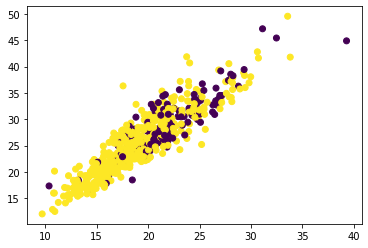

In [ ]:
plt.scatter(x=df['texture_mean'], y=df['texture_worst'], c=df['clusters'])
plt.show()

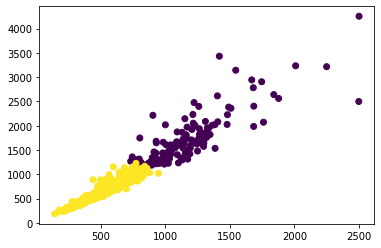

In [ ]:
plt.scatter(x=df['area_mean'], y=df['area_worst'], c=df['clusters'])
plt.show()

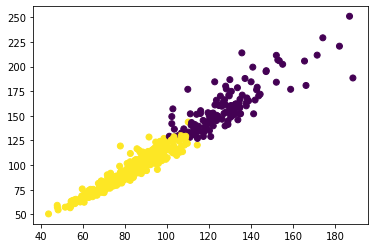

In [ ]:
plt.scatter(x=df['perimeter_mean'], y=df['perimeter_worst'], c=df['clusters'])
plt.show()

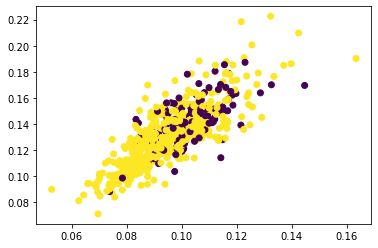

In [ ]:
plt.scatter(x=df['smoothness_mean'], y=df['smoothness_worst'], c=df['clusters'])
plt.show()

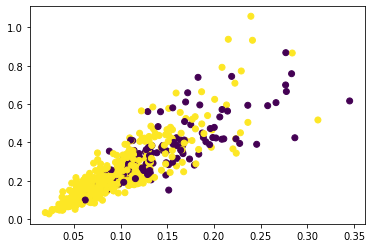

In [ ]:
plt.scatter(x=df['compactness_mean'], y=df['compactness_worst'], c=df['clusters'])
plt.show()

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [ ]:
df['diagnosis'] = df_original['diagnosis']
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,clusters,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,25.38,17.33,184.60,2019.0,0.1622,0.6656,0,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,24.99,23.41,158.80,1956.0,0.1238,0.1866,0,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,23.57,25.53,152.50,1709.0,0.1444,0.4245,0,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,14.91,26.50,98.87,567.7,0.2098,0.8663,1,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,22.54,16.67,152.20,1575.0,0.1374,0.2050,0,M


In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
(pd.crosstab(index=df['clusters'],
             columns=df['diagnosis'],
             normalize=True, margins=True)) * 100

diagnosis,B,M,All
clusters,,,
0,0.175747,22.671353,22.8471
1,62.565905,14.586995,77.1529
All,62.741652,37.258348,100.0000


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [ ]:
# Standardize the data
principle_components = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
pca = PCA(n_components=0.9)
Z = scaler.fit_transform(principle_components)
principle_components = pd.DataFrame(pca.fit_transform(Z))

print(principle_components.shape)
principle_components.head()

(569, 4)


,0,1,2,3
0,5.069569,2.399980,-3.432181,1.555644
1,3.747829,-2.669786,-1.423654,-0.560089
2,4.423904,0.135107,-0.756282,-0.089172
3,1.343376,6.903362,0.178411,1.265439
4,3.438885,-1.149978,-2.827432,-0.460856


In [ ]:
# Rename principle component columns
pc_cols = []
for i in principle_components.columns:
  pc_cols.append(f"PC{i+1}")

principle_components.columns = pc_cols
principle_components.head()

,PC1,PC2,PC3,PC4
0,5.069569,2.399980,-3.432181,1.555644
1,3.747829,-2.669786,-1.423654,-0.560089
2,4.423904,0.135107,-0.756282,-0.089172
3,1.343376,6.903362,0.178411,1.265439
4,3.438885,-1.149978,-2.827432,-0.460856


In [ ]:
principle_components.describe()

,PC1,PC2,PC3,PC4
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-7.024258e-17,-1.139491e-16,-4.760886e-17,3.258475e-17
std,2.778672e+00,1.519665e+00,1.284437e+00,7.701293e-01
min,-4.260721e+00,-3.246944e+00,-3.432181e+00,-1.693007e+00
25%,-2.054315e+00,-1.073269e+00,-8.626120e-01,-5.033166e-01
50%,-1.008188e+00,-2.037317e-01,-1.121198e-01,-7.409345e-02
75%,1.625827e+00,9.362490e-01,7.179154e-01,4.322451e-01
max,1.116828e+01,6.903362e+00,4.707096e+00,3.152067e+00


In [ ]:
print(f"""
Variance percentages: {pca.explained_variance_ratio_ *100}
""")


Variance percentages: [59.28804874 17.7332576  12.66829158  4.55428267]



[5697.266029995058, 2423.676286604752, 1713.8943983617223, 1375.3921122569516, 1114.4039466094957, 936.8421262303988, 832.7017907802748, 739.0867598940645, 675.184734885664, 610.2855450466519]


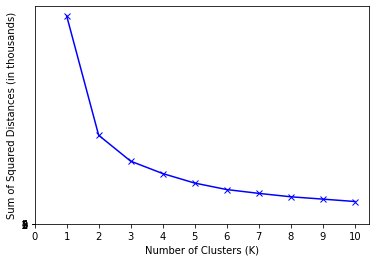

In [ ]:
# Perform kmeans clustering of the principle components, just the first two
first_two_pcs = principle_components[['PC1', 'PC2']]

# Find best value of k
K = range(1, 11)
sum_of_squared_distances = []
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(first_two_pcs)
  sum_of_squared_distances.append(km.inertia_)

# Print the inertia values
print(sum_of_squared_distances)

# Plot the inertia values
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xticks(ticks=range(0, 11))
plt.yticks(ticks=range(0, 6))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (in thousands)')
plt.show()

In [ ]:
# Audio graph
# Uncomment the line below to play the audio graph
#SonifyTool(x=K, y=sum_of_squared_distances, duration_args=duration_args).play()

In [ ]:
# Perform kmeans clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(first_two_pcs)
principle_components['clusters'] = kmeans.labels_
principle_components['clusters'].value_counts()

1    413
0    156
Name: clusters, dtype: int64

In [ ]:
# Perform kmeans clustering on all components
kmeans = KMeans(n_clusters=2)
kmeans.fit(principle_components)
principle_components['clusters'] = kmeans.labels_
principle_components['clusters'].value_counts()

1    413
0    156
Name: clusters, dtype: int64

In [ ]:
principle_components['diagnosis'] = df_original['diagnosis']

# Crosstab of clusters and diagnosis
(pd.crosstab(index=principle_components['clusters'],
             columns=principle_components['diagnosis'],
             normalize=True, margins=True)) * 100

diagnosis,B,M,All
clusters,,,
0,0.000000,27.416520,27.41652
1,62.741652,9.841828,72.58348
All,62.741652,37.258348,100.00000


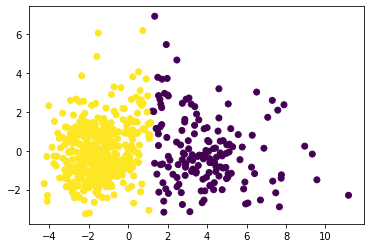

In [ ]:
# Visualize the clusters
plt.scatter(x=principle_components['PC1'], y=principle_components['PC2'],
                                   c=principle_components['clusters'])
plt.show()

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

The crosstabs above show the split between cells labeled B (benign) and cells labeled M (malignant,) as it relates to the clusters that kmeans placed them in.

The first table was produced using the raw data, and shows slightly less accuracy in the kmeans clusters than the second table, which was produced using the principle components. In table 1, about 0.2% of benign cells and about 15% of the malignant cells were placed in the wrong cluster. In table 2, all benign cells were clustered correctly. Only about 10% of malignant cells were misplaced as opposed to 15.

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project